In [269]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import os
from matplotlib.mlab import psd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import xgboost as xgb
import os
import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import clear_output
import keras_tuner as kt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
import random

In [178]:
num_chans = 16
fs = 125
notch_f = 60
Q_factor = 30
lp_f = 2
iir_hp_2 = signal.iirfilter(2, 2. / fs, btype='highpass')
a, b = signal.iirnotch(notch_f, Q_factor, fs)

In [179]:
def filtering(d):
    filtered_sig = signal.filtfilt(iir_hp_2[0], iir_hp_2[1], d, padlen=0)
    filtnnotch_sig = signal.filtfilt(a, b, filtered_sig, padlen=0)
    return filtnnotch_sig

# All Stim

In [329]:
datadir = r'C:\Users\Gabog\OneDrive\Desktop\NTColumbia\Data\SSVEP'
category_folders = [x[0] for x in os.walk(datadir) if 'Bottom' in x[0] or 'Top' in x[0]]
category_folders

['C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\GG\\BottomLeft',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\GG\\BottomMiddle',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\GG\\BottomRight',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\GG\\TopLeft',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\GG\\TopRight',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\JP\\BottomLeft',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\JP\\BottomMiddle',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\JP\\BottomRight',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\JP\\TopLeft',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\JP\\TopRight',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\MC\\BottomLeft',
 'C:\\Users\\Gabog\\OneDrive\\Desktop\\NTColumbia\\Data\\SSVEP\\MC\\BottomMiddle',
 'C:\\Users\\Gabog\\OneDrive\\

In [330]:
os.listdir(category_folders[0])

['64sec_1.csv', '64sec_2.csv', '64sec_3.csv', '64sec_4.csv', '64sec_5.csv']

In [331]:
ids = ['TopLeft', 'TopRight', 'BottomLeft', 'BottomMiddle', 'BottomRight']
positions = [[],[],[],[],[]] #each subarray corresponds to position above
for i, pos in enumerate(ids):
    for f in category_folders:
        if f.endswith(pos):
            for csv in os.listdir(f):
                positions[i].append(np.genfromtxt(os.path.join(f, csv), delimiter=',')[1:])

(array([2.57334176e-02, 9.81521571e-01, 4.97960627e+00, 7.46231873e+00,
        1.09846510e+01, 1.01922937e+01, 4.99905304e+00, 3.78556520e+00,
        4.01721815e+00, 3.25034532e+00, 2.11570377e+00, 2.13979250e+00,
        1.67340153e+00, 1.73366478e+00, 2.11625056e+00, 1.34815188e+00,
        1.23639612e+00, 8.62062431e-01, 9.11657874e-01, 1.21232070e+00,
        1.08156522e+00, 8.92309403e-01, 7.97382254e-01, 5.94290471e-01,
        4.56079418e-01, 4.05177211e-01, 4.20031485e-01, 5.72753741e-01,
        6.04274779e-01, 5.78382400e-01, 2.22612485e+00, 2.59054410e+00,
        5.08804201e-01, 3.17727131e-01, 2.98408429e-01, 3.53774967e-01,
        3.46294177e-01, 3.40677860e-01, 3.06195787e-01, 2.16594025e-01,
        1.88888620e-01, 2.80992819e-01, 2.93402849e-01, 1.97573257e-01,
        1.54878952e-01, 1.64087471e-01, 1.59665968e-01, 1.43928019e-01,
        1.22750616e-01, 1.07384683e-01, 1.27682339e-01, 9.29171860e-02,
        8.16694562e-02, 8.85576612e-02, 1.07788394e-01, 9.167949

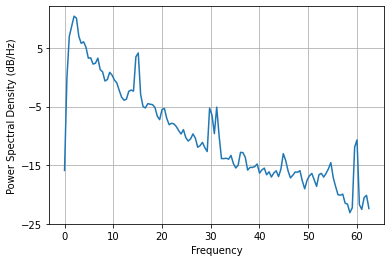

In [332]:
# plt.plot(filtering(positions[0][15][15,150:]))
plt.psd(filtering(positions[0][0][15,150:]), Fs=fs)

In [333]:
featnlab = []
for ii in range(5):
    for bruh, tri in enumerate(positions[ii]):
        for chan in [14, 15]:
            if not (np.isnan(tri).any()):
                pow_fxx, fxx = psd(filtering(tri[chan, 125:]), Fs=fs)
                featnlab.append(np.append(pow_fxx, ii))

In [341]:
fnl = np.array(featnlab)
fnl.shape
np.random.shuffle(fnl)

In [342]:
x = fnl[:, :129]
y = fnl[:, 129:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [343]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(x_train, y_train)
y_p = model_XGB.predict(x_test)
accuracy_p = accuracy_score(y_test, [r for r in y_p])
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))

Accuracy for XGB: 55.00%


In [369]:
inputs = tf.keras.Input(shape=(x_test.shape[1],))
z = tf.keras.layers.Dense(256, activation='relu')(inputs)
z = tf.keras.layers.Dropout(0.05)(z)
outputs = tf.keras.layers.Dense(5, activation='softmax')(z)

model_cnn = tf.keras.Model(inputs, outputs)

In [373]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 128
epochs = 1000

history = model_cnn.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=epochs,
    callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=500,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
    )]
)

Epoch 1/1000
2/2 [==============================] - 1s 182ms/step - loss: 2.9971 - accuracy: 0.3611 - val_loss: 39.3762 - val_accuracy: 0.2500
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 5.7690 - accuracy: 0.3750 - val_loss: 15.2296 - val_accuracy: 0.2500
Epoch 3/1000
2/2 [==============================] - 0s 36ms/step - loss: 5.8127 - accuracy: 0.3750 - val_loss: 8.3222 - val_accuracy: 0.3750
Epoch 4/1000
2/2 [==============================] - 0s 33ms/step - loss: 2.7664 - accuracy: 0.2986 - val_loss: 4.0592 - val_accuracy: 0.3750
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 3.3578 - accuracy: 0.3472 - val_loss: 11.3096 - val_accuracy: 0.3125
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 2.9216 - accuracy: 0.3681 - val_loss: 21.5844 - val_accuracy: 0.2500
Epoch 7/1000
2/2 [==============================] - 0s 32ms/step - loss: 3.0030 - accuracy: 0.3333 - val_loss: 17.5771 - val_accuracy: 0.1875
Epoch 8